# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   Dataset ini berasal dari Kaggle: https://www.kaggle.com/datasets/wowevan/dataset-kesejahteraan-pekerja-indonesia?resource=download&select=garisKemiskinan.csv
   
3. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.✅
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
     - Total baris: 5460 ✅
     - Total kolom: 6 ✅
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*:✅
         - provinsi Nama provinsi (kategorikal)
         - jenis Jenis garis kemiskinan (kategorikal: makanan/non-makanan)
         - daerah Kategori wilayah (kategorikal: perkotaan/perdesaan)
         - tahun Tahun data diambil (numerikal)
         - periode Periode (Maret/September) (kategorikal)
     - *Numerikal*:✅
         - gk Nilai garis kemiskinan (numerikal)

4. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.✅

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [165]:
# Manipulasi data
import pandas as pd
import numpy as np
import sklearn

# Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Reduksi dimensi (opsional untuk visualisasi)
from sklearn.decomposition import PCA

# Klasifikasi
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Untuk mengabaikan warning yang tidak penting
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [169]:
# Memuat dataset
df = pd.read_csv('garisKemiskinan.csv')

In [171]:
# Menampilkan 5 baris pertama
print("5 Baris Pertama Dataset:")
display(df.head())

5 Baris Pertama Dataset:


,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


In [173]:
# Info struktur dataset
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


In [175]:
# Cek jumlah missing values
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())


Jumlah Missing Values per Kolom:
provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [178]:
# 4.1.1 Jumlah baris dan kolom
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")

# 4.1.2 Jenis data setiap kolom
print("\nTipe Data per Kolom:")
print(df.dtypes)

# Pisahkan kolom numerik dan kategorikal
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
kategorikal_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nKolom Numerik:", numerik_cols)
print("Kolom Kategorikal:", kategorikal_cols)

Jumlah Baris: 5460
Jumlah Kolom: 6

Tipe Data per Kolom:
provinsi     object
jenis        object
daerah       object
tahun         int64
periode      object
gk          float64
dtype: object

Kolom Numerik: ['tahun', 'gk']
Kolom Kategorikal: ['provinsi', 'jenis', 'daerah', 'periode']


In [180]:
# 4.2.1 Cek jumlah missing values
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())

# Persentase missing values
missing_percent = df.isnull().mean() * 100
print("\nPersentase Missing Values (%):")
print(missing_percent.sort_values(ascending=False))


Jumlah Missing Values per Kolom:
provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

Persentase Missing Values (%):
gk          3.644689
provinsi    0.000000
jenis       0.000000
daerah      0.000000
tahun       0.000000
periode     0.000000
dtype: float64


In [182]:
# Mengisi missing value dengan median (numerik) atau modus (kategori)
for col in numerik_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in kategorikal_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

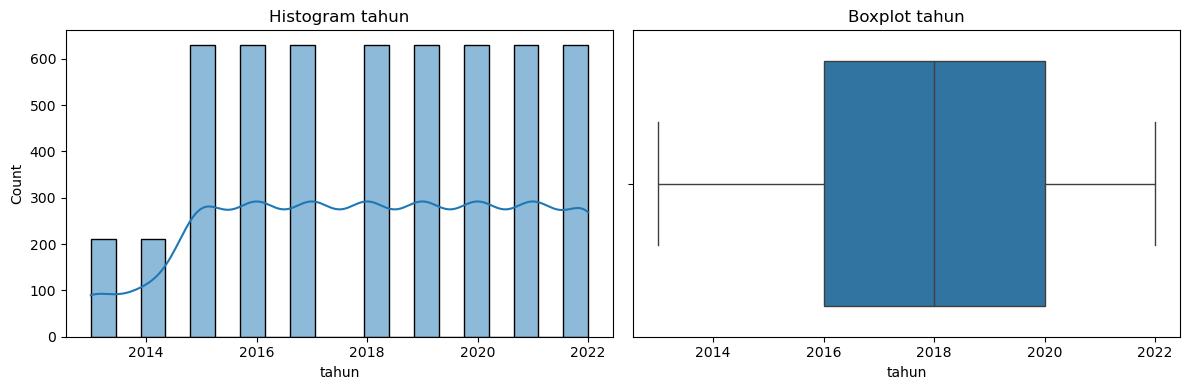

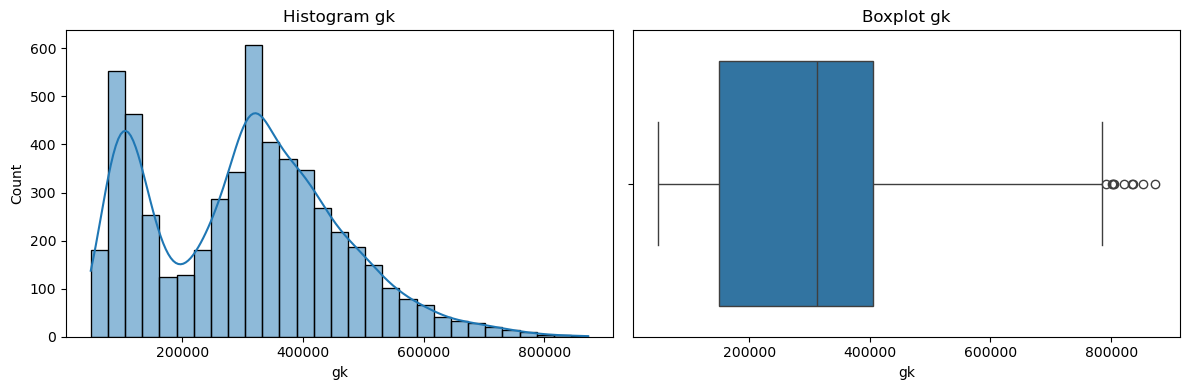

In [184]:
# 4.3.1 Histogram & Boxplot untuk variabel numerik
for col in numerik_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axs[0])
    axs[0].set_title(f'Histogram {col}')
    sns.boxplot(x=df[col], ax=axs[1])
    axs[1].set_title(f'Boxplot {col}')
    plt.tight_layout()
    plt.show()

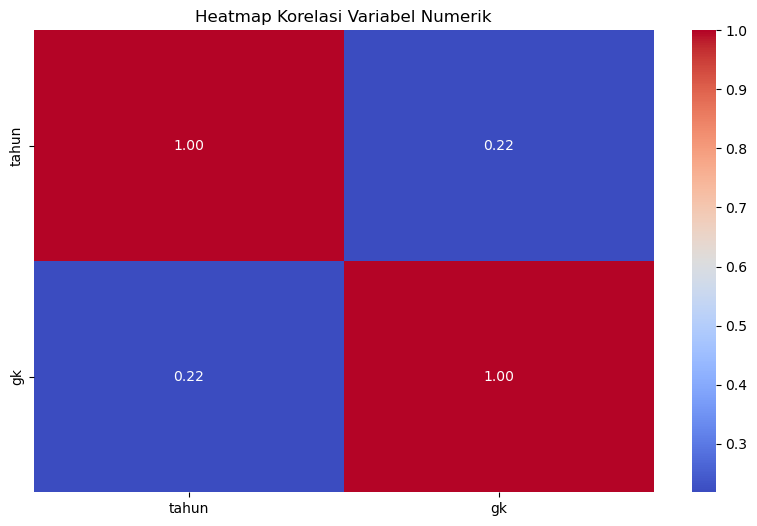

In [185]:
# 4.3.2 Korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerik_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

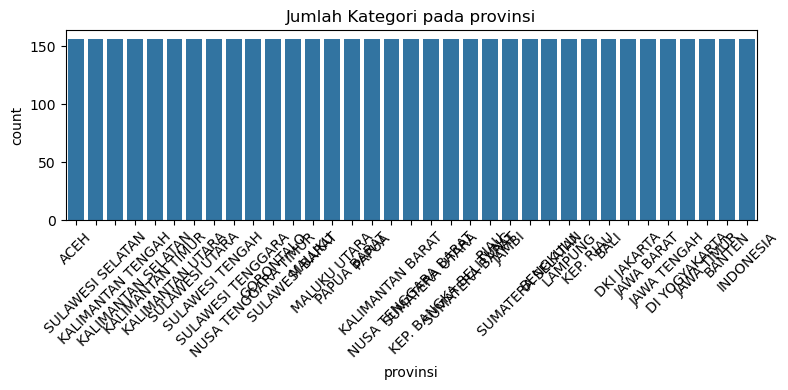

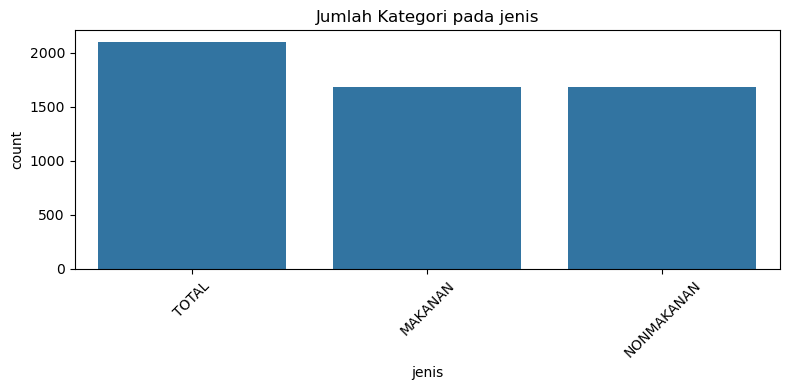

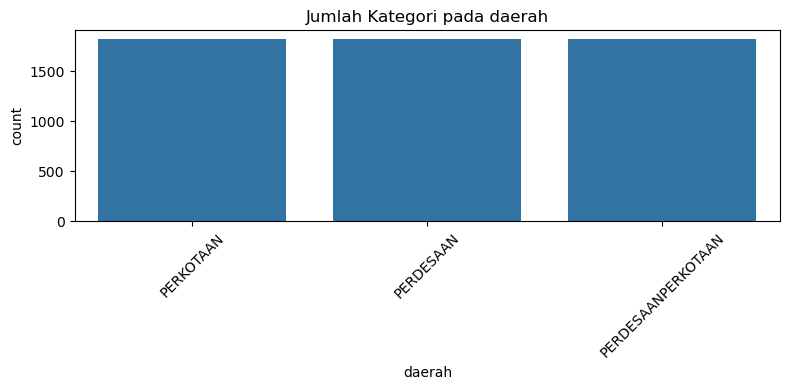

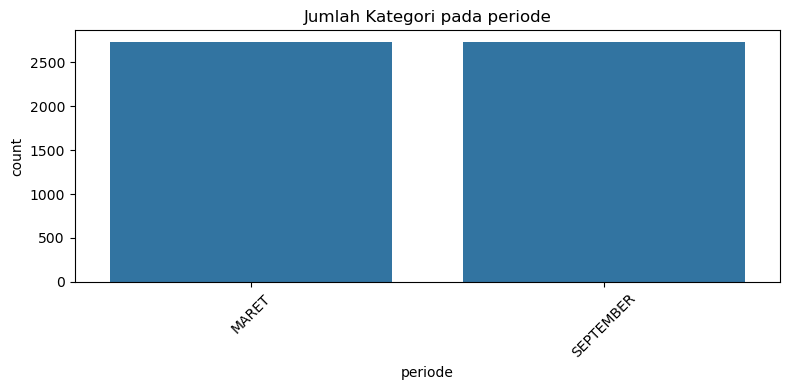

In [186]:
# 4.4.1 Barplot untuk variabel kategorikal
for col in kategorikal_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Jumlah Kategori pada {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

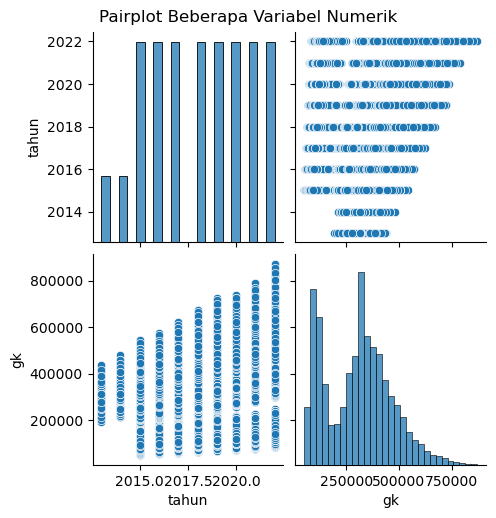

In [189]:
# 4.4.2 Pairplot (untuk sebagian fitur numerik, jika terlalu banyak)
sns.pairplot(df[numerik_cols[:4]])  # Ambil 4 kolom pertama agar tidak berat
plt.suptitle('Pairplot Beberapa Variabel Numerik', y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [193]:
# Imputasi missing values
for col in numerik_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in kategorikal_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [195]:
print("Jumlah data duplikat:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Jumlah data duplikat: 0


In [198]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerik_cols] = scaler.fit_transform(df[numerik_cols])

In [200]:
# Deteksi outlier dengan IQR
for col in numerik_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outlier")

# (Opsional) Menghapus outlier
# df = df[~((df[col] < lower) | (df[col] > upper))]

tahun: 0 outlier
gk: 9 outlier


In [202]:
# Buat encoder dengan parameter yang sesuai versi sklearn
if sklearn.__version__ >= '1.2':
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
else:
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Lakukan encoding
encoded_kategorikal = encoder.fit_transform(df[kategorikal_cols])

# Buat DataFrame dari hasil encoding
encoded_df = pd.DataFrame(encoded_kategorikal, columns=encoder.get_feature_names_out(kategorikal_cols), index=df.index)

# Gabungkan data numerik yang sudah distandardisasi dengan hasil encoding
df_final = pd.concat([df_scaled[numerik_cols], encoded_df], axis=1)

# Cek hasil akhir
print("Data setelah preprocessing (df_final):")
display(df_final.head())
print(f"Bentuk akhir dataset: {df_final.shape}")

Data setelah preprocessing (df_final):


,tahun,gk,provinsi_ACEH,provinsi_BALI,provinsi_BANTEN,provinsi_BENGKULU,provinsi_DI YOGYAKARTA,provinsi_DKI JAKARTA,provinsi_GORONTALO,provinsi_INDONESIA,...,provinsi_SUMATERA SELATAN,provinsi_SUMATERA UTARA,jenis_MAKANAN,jenis_NONMAKANAN,jenis_TOTAL,daerah_PERDESAAN,daerah_PERDESAANPERKOTAAN,daerah_PERKOTAAN,periode_MARET,periode_SEPTEMBER
0,-1.208955,-0.067946,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-1.208955,-0.013644,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.820896,0.012859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.820896,0.099970,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-1.208955,-0.043587,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Bentuk akhir dataset: (5460, 45)


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [207]:
# Inisialisasi KMeans untuk percobaan awal
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_final)

# Menambahkan label hasil cluster ke dataframe
df_final['cluster'] = kmeans.labels_

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

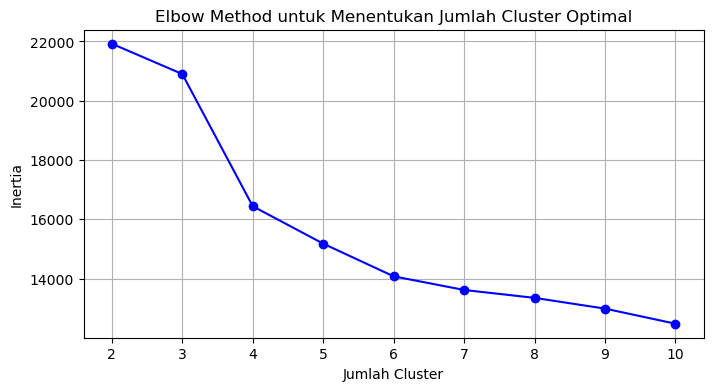

In [211]:
inertia = []
K = range(2, 11)  # coba 2 sampai 10 cluster

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_final)
    inertia.append(kmeans.inertia_)

# Visualisasi elbow
plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.grid()
plt.show()

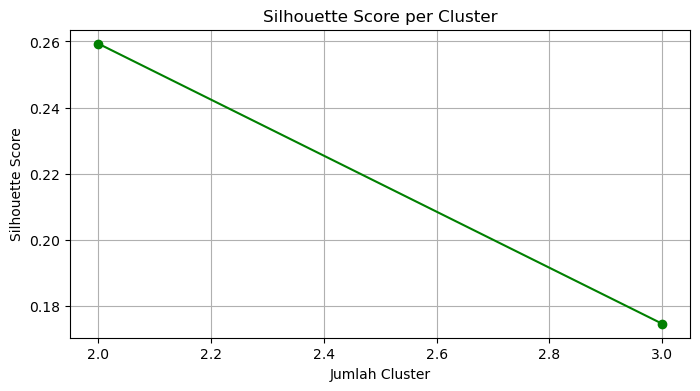

Jumlah cluster optimal: 2
Silhouette Score tertinggi: 0.2593


In [212]:
silhouette_scores = []
for k in range(2, 4):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_final)
    score = silhouette_score(df_final, labels)
    silhouette_scores.append(score)

# Visualisasi silhouette score
plt.figure(figsize=(8,4))
plt.plot(range(2, 4), silhouette_scores, 'go-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per Cluster')
plt.grid()
plt.show()

# Menampilkan nilai tertinggi
optimal_k = range(2, 4)[silhouette_scores.index(max(silhouette_scores))]
print(f"Jumlah cluster optimal: {optimal_k}")
print(f"Silhouette Score tertinggi: {max(silhouette_scores):.4f}")

In [214]:
# Lakukan clustering ulang dengan k optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
df_final['cluster'] = kmeans_optimal.fit_predict(df_final)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

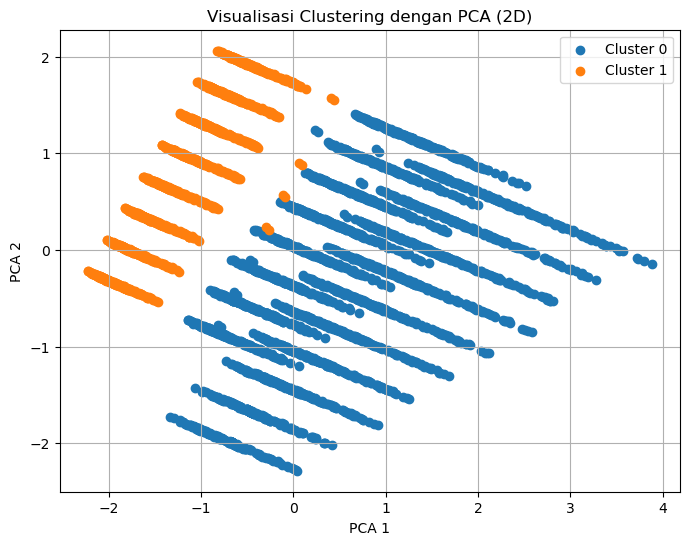

In [219]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_final.drop('cluster', axis=1))

df_viz = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_viz['cluster'] = df_final['cluster']

plt.figure(figsize=(8,6))
for i in df_viz['cluster'].unique():
    plt.scatter(df_viz[df_viz['cluster'] == i]['PCA1'],
                df_viz[df_viz['cluster'] == i]['PCA2'],
                label=f'Cluster {i}')
    
plt.title('Visualisasi Clustering dengan PCA (2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [225]:
# Tambahkan label cluster
df_final['cluster'] = kmeans.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [229]:
# Inverse fitur numerik
df_numerik_asli = pd.DataFrame(scaler.inverse_transform(df_scaled[numerik_cols]), 
                               columns=numerik_cols, index=df_final.index)

In [231]:
# Ambil hanya kolom hasil encoding
encoded_cols = encoder.get_feature_names_out(kategorikal_cols)

# Ambil bagian encoded dari df_final
encoded_values = df_final[encoded_cols]

# Inverse transform one-hot → kategorikal asli
decoded_kategorikal = encoder.inverse_transform(encoded_values)
df_kategorikal_asli = pd.DataFrame(decoded_kategorikal, columns=kategorikal_cols, index=df_final.index)

In [233]:
# Gabungkan kembali data numerik, kategorikal, dan label cluster
df_clustered_full = pd.concat([df_numerik_asli, df_kategorikal_asli], axis=1)
df_clustered_full['cluster'] = df_final['cluster']

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [237]:
# Rata-rata numerik per cluster
cluster_numerik_summary = df_clustered_full.groupby('cluster')[numerik_cols].mean()

# Modus kategorikal per cluster
cluster_kategorikal_summary = df_clustered_full.groupby('cluster')[kategorikal_cols].agg(lambda x: x.mode()[0])

# Gabungkan analisis
cluster_summary = pd.concat([cluster_numerik_summary, cluster_kategorikal_summary], axis=1)

display(cluster_summary)

,tahun,gk,provinsi,jenis,daerah,periode
cluster,,,,,,
0,2017.941363,386199.683043,DKI JAKARTA,TOTAL,PERDESAAN,MARET
1,2020.500000,134061.448810,ACEH,NONMAKANAN,PERDESAAN,MARET
2,2016.503597,103623.272182,ACEH,NONMAKANAN,PERDESAANPERKOTAAN,MARET


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Tahun Data:** 2017.94
- **Rata-rata Garis Kemiskinan:** Rp 386.199
- **Provinsi Dominan:** DKI JAKARTA
- **Jenis Konsumsi Dominan:** TOTAL
- **Wilayah Dominan:** Perdesaan
- **Periode Dominan:** Maret 
- **Analisis:** Cluster ini mencerminkan kondisi wilayah perdesaan di DKI Jakarta pada tahun 2017. Dengan jenis konsumsi total, data ini memberikan gambaran menyeluruh mengenai pengeluaran dasar masyarakat. Rata-rata garis kemiskinan yang tinggi menunjukkan bahwa biaya hidup di daerah ini cukup besar, bahkan untuk wilayah yang tergolong perdesaan di provinsi urban seperti Jakarta. Hal ini bisa mengindikasikan urbanisasi yang meluas ke pinggiran kota.

## Cluster 1: 
- **Rata-rata Tahun Data:** 2020.50
- **Rata-rata Garis Kemiskinan:** Rp 134.061
- **Provinsi Dominan:** ACEH
- **Jenis Konsumsi Dominan:** NONMAKANAN
- **Wilayah Dominan:** Perdesaan
- **Periode Dominan:** Maret
- **Analisis:** Cluster ini mencerminkan kondisi perdesaan di Provinsi Aceh dengan fokus pada konsumsi nonmakanan. Meskipun berasal dari tahun data yang paling baru, rata-rata garis kemiskinan relatif rendah dibanding cluster lainnya. Ini dapat menunjukkan bahwa kebutuhan pokok sudah relatif tercukupi, dan beban ekonomi lebih banyak berasal dari pengeluaran sekunder. Konsentrasi pada konsumsi nonmakanan juga bisa menggambarkan perkembangan sosial atau perubahan pola konsumsi masyarakat.

## Cluster 2:
- **Rata-rata Tahun Data:** 2016.50
- **Rata-rata Garis Kemiskinan:** Rp 103.623
- **Provinsi Dominan:** ACEH
- **Jenis Konsumsi Dominan:** NONMAKANAN
- **Wilayah Dominan:** PerdesaanPerkotaan
- **Periode Dominan:** Maret
- **Analisis:** Cluster ini berisi data campuran dari wilayah perdesaan dan perkotaan di Aceh pada tahun 2016, dengan fokus pada konsumsi nonmakanan. Garis kemiskinan terendah di antara ketiga cluster menunjukkan bahwa wilayah ini mungkin memiliki tekanan ekonomi yang lebih ringan. Namun, adanya kombinasi wilayah menunjukkan heterogenitas data yang bisa jadi mencerminkan daerah peralihan antara desa dan kota, dengan konsumsi nonmakanan yang dominan mengindikasikan kebutuhan sekunder yang mulai meningkat seiring pembangunan wilayah.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [241]:
# Menggabungkan data cluster akhir (yang sudah dilakukan inverse transform sebelumnya)
# Data ini sudah termasuk hasil inverse transform dan penambahan kolom 'Cluster'
df_final.to_csv("hasil_clustering.csv", index=False)